<a href="https://colab.research.google.com/github/ClauCll/Curso_ML_A_Z/blob/master/Regresi%C3%B3n/Regresion_Bajas_Antiguedad_v8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cuantas serán las bajas voluntarias de los clientes fijos para un periodo x. (Agosto - Diciembre 2020)
 

In [97]:
import pandas as pd
import numpy as np

#Gráfico
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt 
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

import gspread
from oauth2client.client import GoogleCredentials 
from google.colab import auth
# Autoriza Claudia
auth.authenticate_user()
gc = gspread.authorize (GoogleCredentials.get_application_default())

### leemos datos

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
data = pd.read_csv('/content/drive/My Drive/Dataset/M_BAJAS.txt',delimiter='~')
data.Fecha = pd.to_datetime(data.FECHA_BAJA)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [ ]:
data.head(5)

In [100]:
encabezados= ['Año','Mes','Fecha','Antiguedad','Cant_Bajas']
data.columns=encabezados

In [ ]:
data.head(5)

In [ ]:
 #validamos datos faltantes
 print(pd.isnull(data).sum())

In [ ]:
data.describe(include='all')

In [ ]:
data.info 

In [102]:
#Agrupamos la columna antiguedad
#1 : 1 TRIMESTRE (0-93 DIAS)
#2 : 2 TRIMESTRE (94-186 DIAS)
#3 : 3 TRIMESTRE (187-279 DIAS)
#4 : 4 TRIMESTRE (280-370 DIAS)
#5 : A 2 AÑOS (371-725 DIAS) 
#6 : A 3 AÑOS (726-1095 DIAS)
#7 : 4 años en adelante (Máximo DIAS 7276) 
bins=[-1,93,186,279,370,725,1095,7276]
names=['1','2','3','4','5','6','7']
data['Antiguedad'] = pd.cut(data['Antiguedad'],bins,labels=names)

In [103]:
#validamos datos sin clasificar
data[pd.isnull(data.Antiguedad)]

,Año,Mes,Fecha,Antiguedad,Cant_Bajas


In [104]:
#pasamos datos a clasificados a entero
data['Antiguedad'] = data['Antiguedad'].astype('int64')

In [ ]:
data.dtypes

In [ ]:
data.head(5)

In [ ]:
 #validamos datos faltantes
 print(pd.isnull(data).sum())

In [107]:
grupo = data.groupby(by = ['Año','Mes','Antiguedad']).sum()
grupo= pd.DataFrame(grupo).reset_index()

In [ ]:
grupo.head(5)

In [ ]:
 #validamos datos faltantes
 print(pd.isnull(grupo).sum())

In [96]:
#grupo.dropna(subset = ['Cant_Bajas'] , axis=0, inplace=True)

In [112]:
x= grupo.iloc[:,:-1].values
x=np.array(x)
y= grupo.iloc[:,3].values
y = y[:,np.newaxis]

In [124]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder= LabelEncoder()
x[:,2] = labelencoder.fit_transform(x[:,2])
ct = ColumnTransformer([('one_hot_encoder',OneHotEncoder(categories='auto'),[2])],remainder='passthrough')
x=np.array(ct.fit_transform(x),dtype=np.int)

In [126]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [130]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
x_poly_train = poly_reg.fit_transform(x_train)
x_poly_test = poly_reg.fit_transform(x_test)

from sklearn.linear_model import LinearRegression
lineal_poly = LinearRegression()
lineal_poly.fit(x_poly_train,y_train)

print("precisión del modelo regresión polinomial")
lineal_poly.score(x_poly_train,y_train)

precisión del modelo regresión polinomial


0.881223363134311

In [ ]:
y_predic = lineal_poly.predict(x_poly_test)

In [ ]:
print(len(x_test))
print(len(y_test))

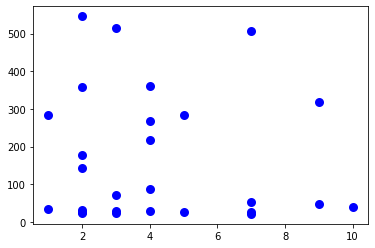

In [ ]:
#Gráfica
plt.scatter(x_test[:,8],y_test,color='Blue',linewidth=3)
#plt.plot(x_test,y_predic,color='red',linewidth=3)
plt.show()

In [ ]:
pd.DataFrame(x_test)

In [ ]:
pd.DataFrame(y_test)

In [111]:
grupo.corr(method ='pearson')

,Año,Mes,Antiguedad,Cant_Bajas
Año,1.000000,-3.729741e-01,0.000000e+00,0.000419
Mes,-0.372974,1.000000e+00,-2.065386e-18,-0.032045
Antiguedad,0.000000,-2.065386e-18,1.000000e+00,0.701732
Cant_Bajas,0.000419,-3.204475e-02,7.017319e-01,1.000000
